In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv("insurance.csv")
df


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df["region"].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [5]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
data=df.head(20)
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


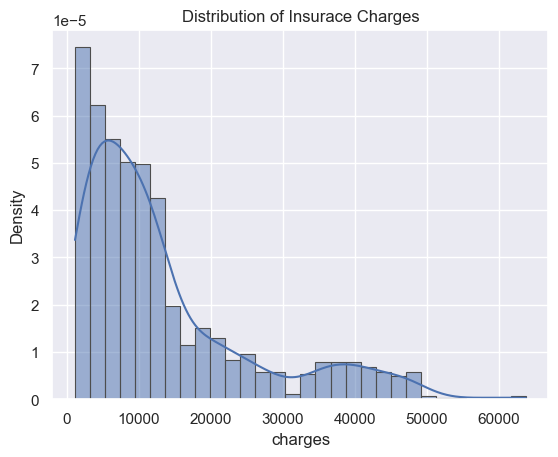

In [7]:
sns.set_theme(style="darkgrid")
sns.histplot(x="charges",data=df,edgecolor=".3",linewidth=.8,kde=True,stat="density")
plt.title("Distribution of Insurace Charges")         
plt.show()

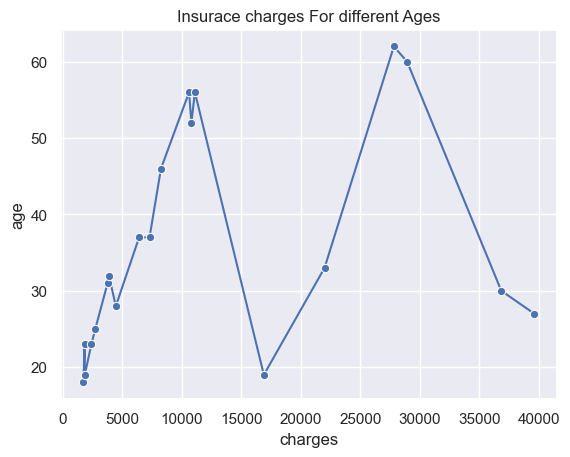

In [8]:
sns.lineplot(x="charges",y="age",data=data,marker="o")
plt.title("Insurace charges For different Ages")
plt.show()

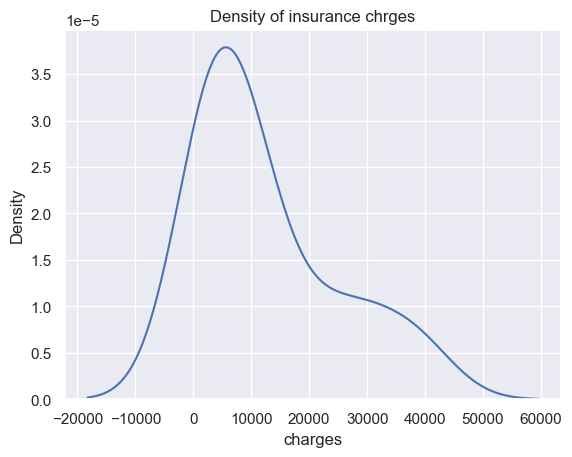

In [8]:
sns.kdeplot(data=data, x="charges")
plt.title("Density of insurance chrges")
plt.show()

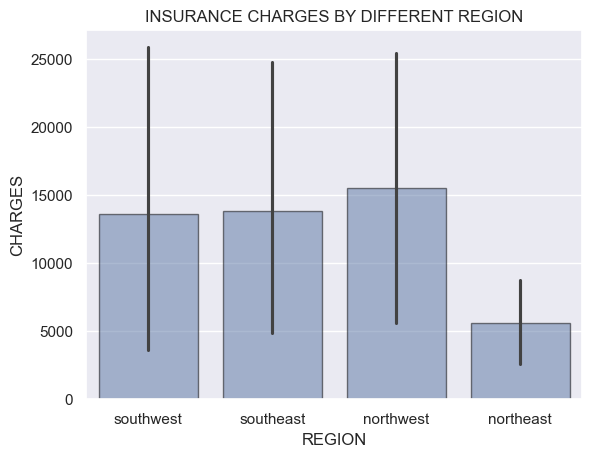

In [9]:
sns.barplot(x="region",y="charges",edgecolor="#000000",alpha=.5,data=data)
plt.title("INSURANCE CHARGES BY DIFFERENT REGION")
plt.xlabel("REGION")
plt.ylabel("CHARGES")
plt.show()

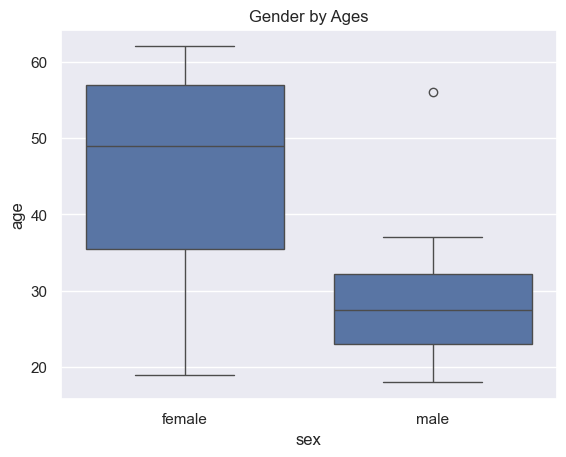

In [10]:
sns.boxplot(x="sex",y="age",data=data)
plt.title("Gender by Ages")
plt.show()

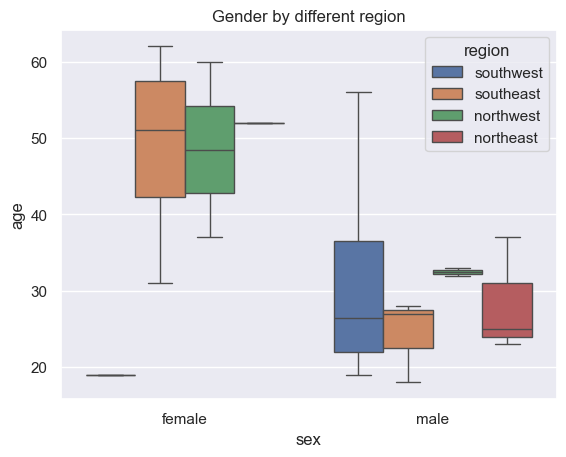

In [11]:
sns.boxplot(x="sex",y="age",hue="region",data=data)
plt.title("Gender by different region")
plt.show()

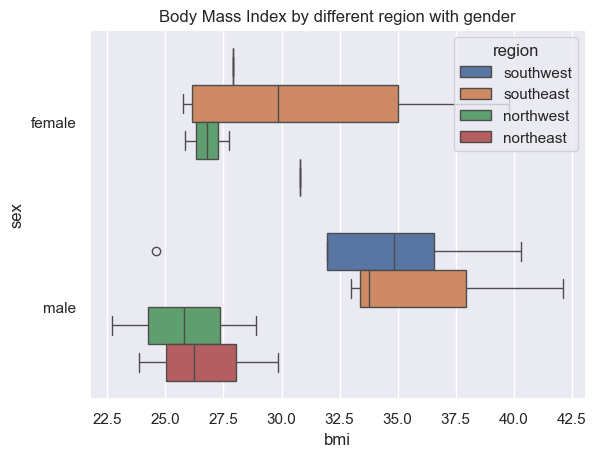

In [12]:
sns.boxplot(x="bmi",y="sex",hue="region",data=data)
plt.title("Body Mass Index by different region with gender")
plt.show()

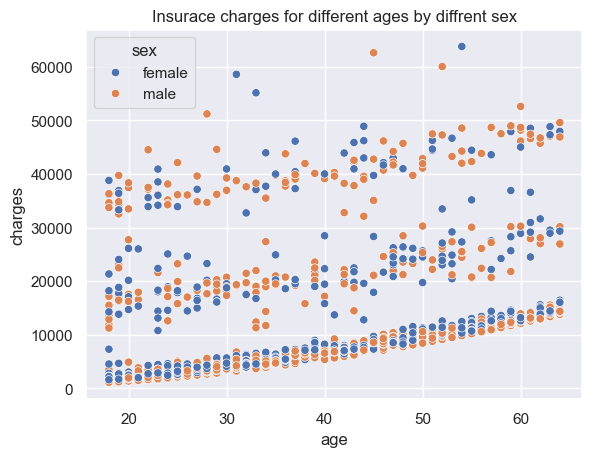

In [13]:
sns.scatterplot(x="age",y="charges",hue="sex",data=df)
plt.title("Insurace charges for different ages by diffrent sex")
plt.show()

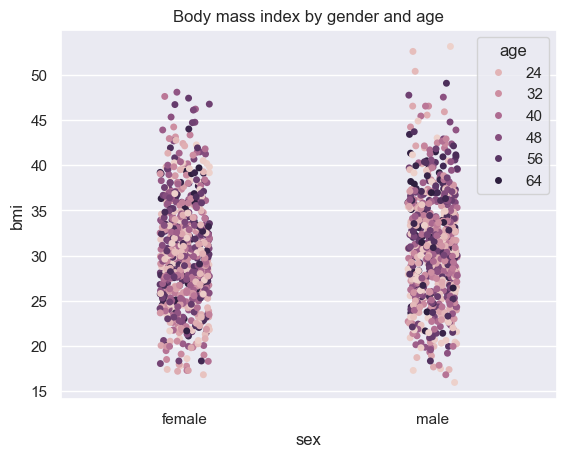

In [14]:
sns.stripplot(x="sex",y="bmi",hue="age",data=df)
plt.title("Body mass index by gender and age")
plt.show()

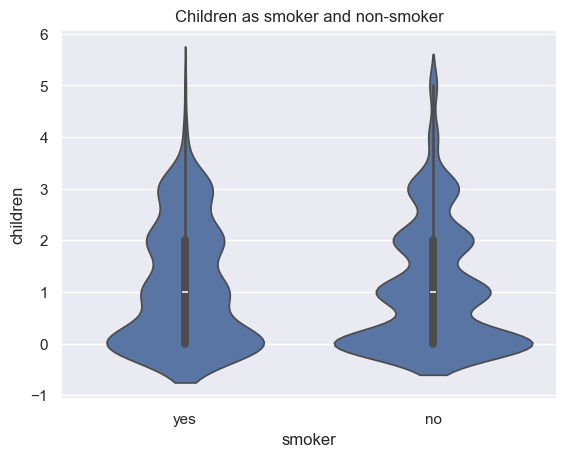

In [15]:
sns.violinplot(data=df,x="smoker",y="children")
plt.title("Children as smoker and non-smoker")
plt.show()

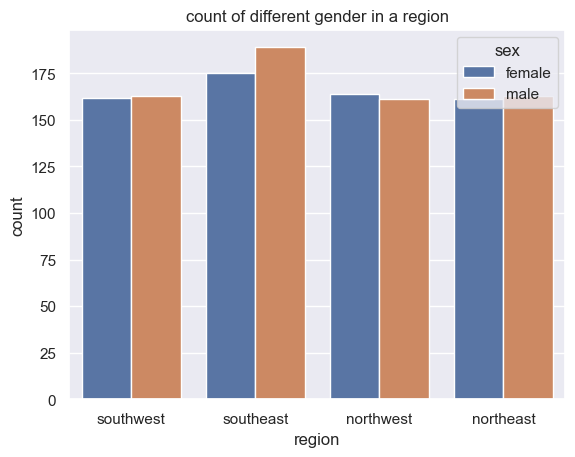

In [16]:
sns.countplot(x="region",hue="sex",data=df)
plt.title("count of different gender in a region")
plt.show()

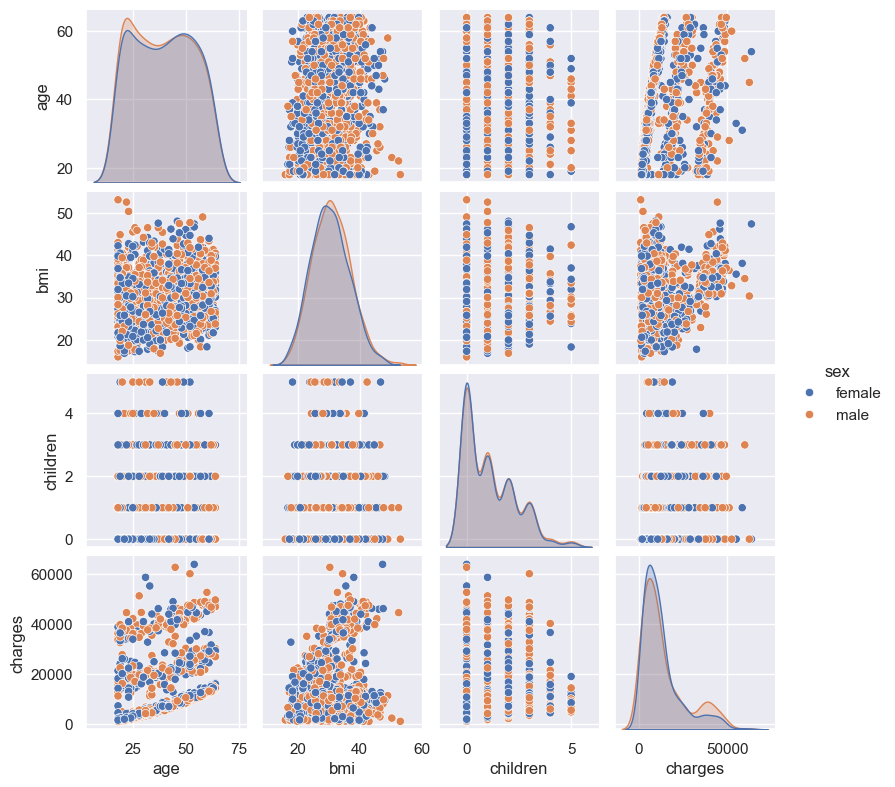

In [17]:
sns.pairplot(data=df,hue="sex", height=2)
plt.show()

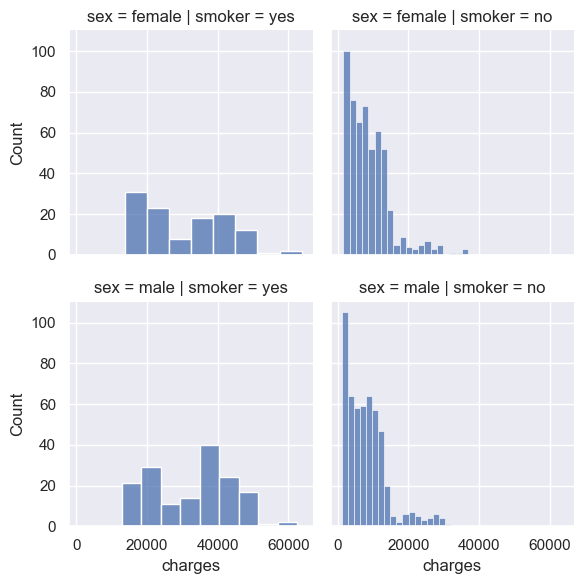

In [20]:
g=sns.FacetGrid(df, col="smoker", row="sex")
g.map(sns.histplot, "charges")
plt.show()

In [24]:

df2= df[df['smoker'] == 'no']

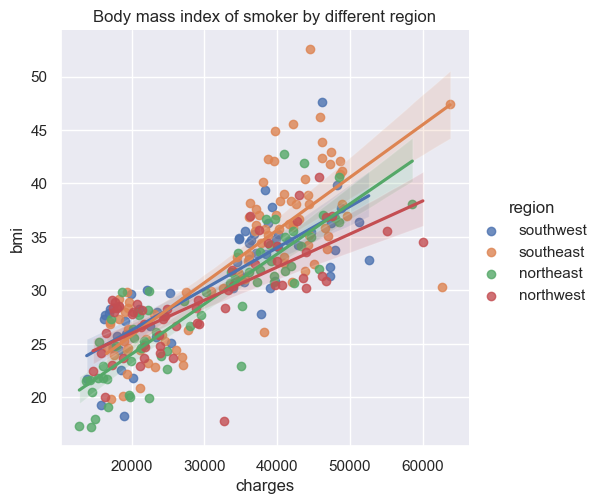

In [21]:
df1 = df[df['smoker'] == 'yes']
sns.lmplot(data=df1,x="charges",y="bmi",hue="region")
plt.title("Body mass index of smoker by different region")
plt.show()

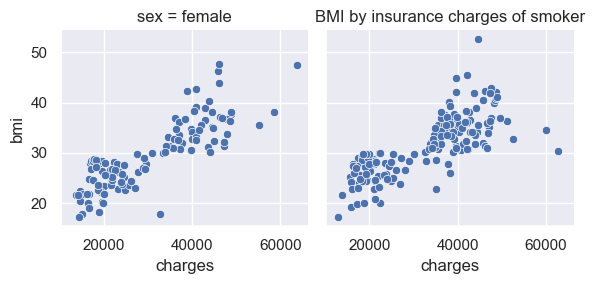

In [22]:
g = sns.FacetGrid(df1, col="sex")
g.map_dataframe(sns.scatterplot, x="charges", y="bmi")
plt.title("BMI by insurance charges of smoker")
plt.show()

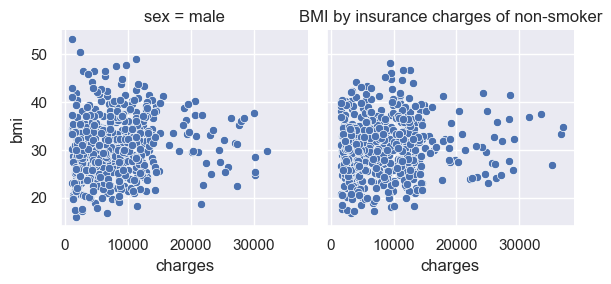

In [25]:
g = sns.FacetGrid(df2, col="sex")
g.map_dataframe(sns.scatterplot, x="charges", y="bmi")
plt.title("BMI by insurance charges of non-smoker")
plt.show()

In [26]:
df1=df.groupby(['region'])['smoker'].count()
df1


region
northeast    324
northwest    325
southeast    364
southwest    325
Name: smoker, dtype: int64

In [27]:
df1.ndim


1

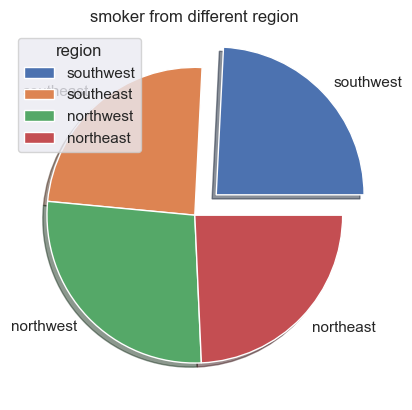

In [28]:
labels = ['southwest', 'southeast', 'northwest', 'northeast'] 
expld=[0.2,0,0,0]
plt.pie(df1, labels=labels,explode=expld,shadow=True)
plt.legend(title="region")
plt.title("smoker from different region")
plt.show()

In [24]:
df2=df.groupby(['smoker'])['children'].count()
df2
len(df2)

2

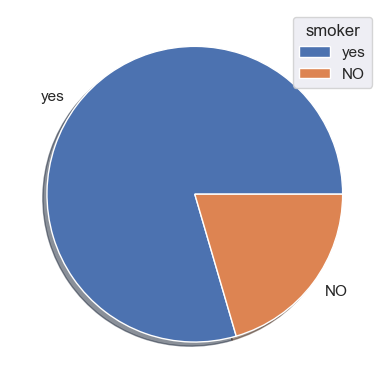

In [25]:
labels = ['yes','NO'] 
plt.pie(df2, labels=labels,shadow=True)
plt.legend(title="smoker")
plt.show()

In [26]:
le=LabelEncoder()
df["sex"]=le.fit_transform(df["sex"])
df["smoker"]=le.fit_transform(df["smoker"])
df["region"]=le.fit_transform(df["region"])
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [27]:
corr=df.corr()
corr

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.157566,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.006208,1.000000


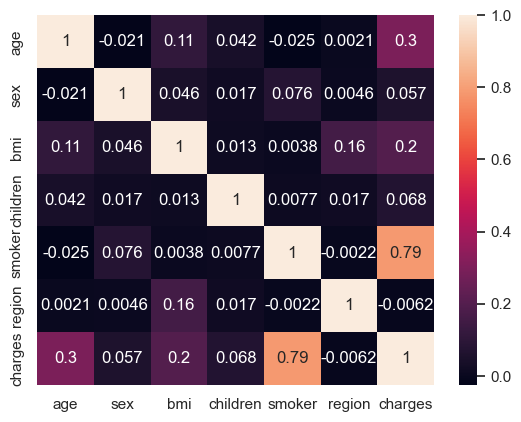

In [28]:
sns.heatmap(corr,annot=True)
plt.show()